In [2]:
from src import *

## Description

Computing metrics specific to one gradient or dynamic gradients.

THE METRIC FUNCTION SHOULD ALIGN TO THE FOLLOWING FORMAT: 

We denote $n,t,v$ respectively the number of features (voxels), the number of timepoints, and the number of eigenvectors (gradients)
- static:
Let $G\subset \mathbb{R}^{n\times v}$: space of gradients $N\subset{\{1,2,3,4,5,6,7\}}$: sets of networks and $d_G:G\times N \rightarrow \mathbb{R}$

- dynamic
Let $F\subset \mathbb{R}^{t\times n\times v}$: space of dynamic gradients $N\subset{\{1,2,3,4,5,6,7\}}$: sets of networks and $d_F:F\times  N \rightarrow \mathbb{R}$

exception to rule is the $\textbf{"explained variance"}$ which is precomputed

GOAL: Compute metrics and make it modulable

## Table of Contents

- [Gradient Metrics (Region/Parcel LVL)](#parcelmetric) 
    - Brainmap of voxel motions

- [Gradient Metrics (Network LVL)](#netmetrics) 
    - Distance between networks of gradients
    - Volume Spanned by Network    

- [Gradient Metrics (Global LVL)](#globalmetrics) 
    - Explained variance timeseries


<a class="anchor" id="metrics"></a>
### Gradient Metrics
Extract metrics useful to correlate with emotions timeseries  from dynamic gradients per person

Movie name used for gradient: `'TC_400_sub-S09_ses-4_Sintel.csv'`

In [3]:
# Loading Gradient Example
weight_path = "./resources/dynamic_grad/gradient_movie_ws140.npy"
G_movie  = np.load(weight_path)
G_rest   = np.load('./resources/dynamic_grad/gradient_rest_ws140.npy')

In [4]:
regions      = list(index2region.keys())
nbr          = len(regions)

#### Distance between networks on gradients
We compute here the distance between two given arguments networks

Text(0.5, 0.98, 'Distance between region clusters')

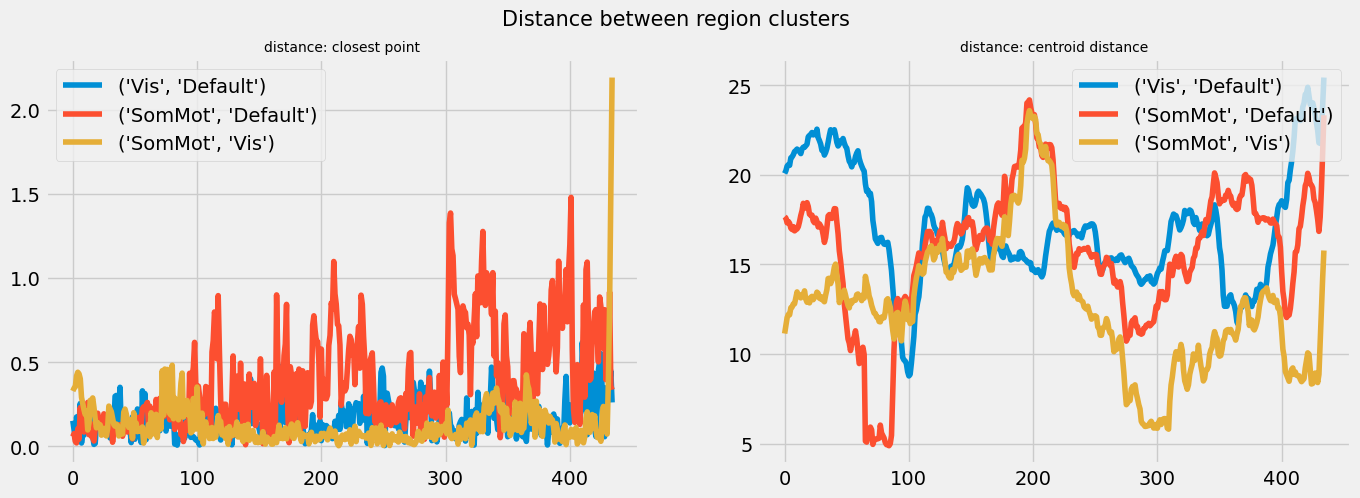

In [19]:
# select two regions and see how their cluster distance evolve
pair1 = ("Vis", "Default")
pair2 = ("SomMot", "Default")
pair3 = ("SomMot", "Vis")

CC1 = [networks_distance(G_movie[i], G_movie[i], 'Vis', 'Default') for i in range(len(G_movie))]
CC2 = [networks_distance(G_movie[i], G_movie[i], 'SomMot', 'Default') for i in range(len(G_movie))]
CC3 = [networks_distance(G_movie[i], G_movie[i], 'SomMot', 'Vis') for i in range(len(G_movie))]

CD1 = [networks_distance(G_movie[i], G_movie[i], 'Vis', 'Default', method='closest') for i in range(len(G_movie))]
CD2 = [networks_distance(G_movie[i], G_movie[i], 'SomMot', 'Default',  method='closest') for i in range(len(G_movie))]
CD3 = [networks_distance(G_movie[i], G_movie[i], 'SomMot', 'Vis',  method='closest') for i in range(len(G_movie))]

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(CD1, label=pair1)
ax[0].plot(CD2, label=pair2)
ax[0].plot(CD3, label=pair3)
ax[1].plot(CC1, label=pair1)
ax[1].plot(CC2, label=pair2)
ax[1].plot(CC3, label=pair3)
ax[0].legend()
ax[0].set_title("distance: closest point", size=10)
ax[1].legend()
ax[1].set_title("distance: centroid distance", size=10)
plt.suptitle('Distance between region clusters', size=15)

#### Heat map of motion of regions

Text(0.5, 1.0, "voxel's gradient motion distribution")

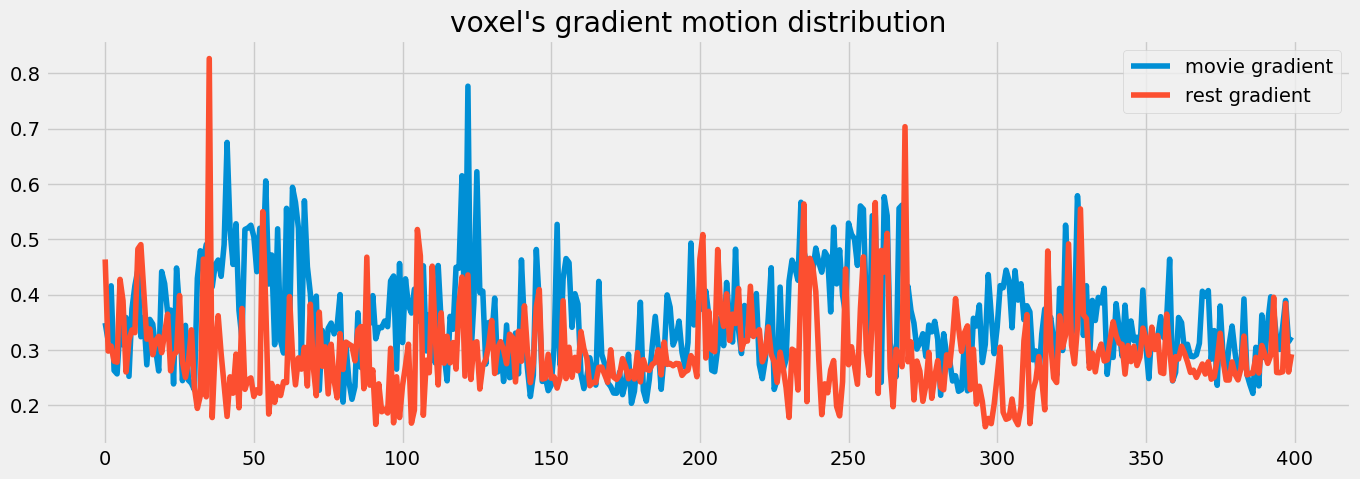

In [28]:
d_movie = mean_region_motion(G_movie)
d_rest  = mean_region_motion(G_rest)

plt.figure(figsize=(15,5))
plt.plot(d_movie, label='movie gradient')
plt.plot(d_rest, label='rest gradient')
plt.legend()
plt.title("voxel's gradient motion distribution")

#### Compute Variance spanned by a network

In [1]:
%timeit network_variance(G_movie[0],'Default')

#### Compute Volume spanned by a network
For instance we have a 3d cloud of points and we can then compute a proxy of the volume of the convex hull spanned by the cloud of points.

In [20]:
%timeit network_volume(G_movie[0],'Default')

1.28 ms ± 3.45 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [21]:
%timeit network_volume(G_movie[0],'Default',method='hull')

196 µs ± 5.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### Explained variance timeseries

In [3]:
LM = np.load('./resources/lambdas_movie_ws200_Sintel.npy')
LR = np.load('./resources/lambdas_rest_ws200_Sintel.npy')

Text(0.5, 1.0, 'Explained variance over time for REST ws=200')

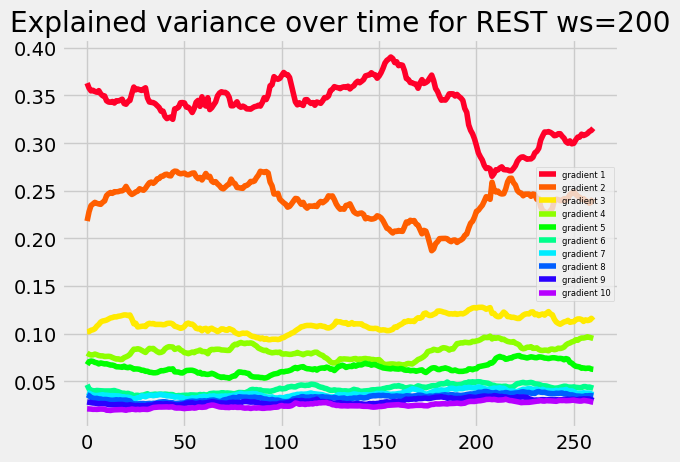

In [14]:
NUM_COLORS = LM.shape[1]
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i in range(NUM_COLORS):
    ax.plot(LR[:,i]/LR.sum(axis=1), label='gradient {}'.format(i+1))
ax.legend(loc=5, prop={'size':6})
ax.set_title("Explained variance over time for REST ws=200")

Text(0.5, 1.0, 'Explained variance over time for MOVIE ws=200')

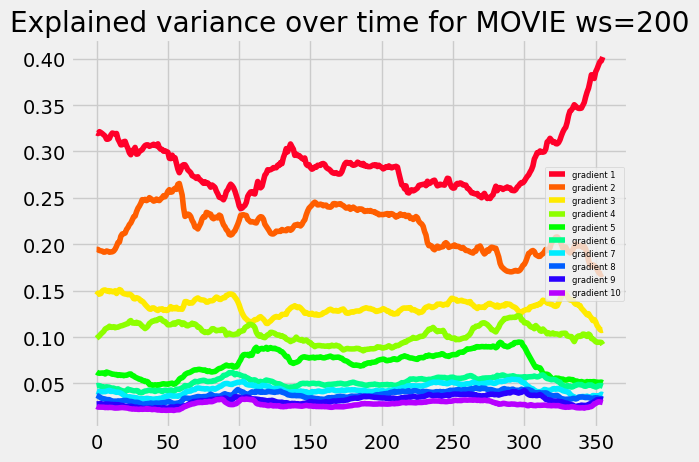

In [15]:
NUM_COLORS = LM.shape[1]
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i in range(NUM_COLORS):
    ax.plot(LM[:,i]/LM.sum(axis=1), label='gradient {}'.format(i+1))
ax.legend(loc=5, prop={'size':6})
ax.set_title("Explained variance over time for MOVIE ws=200")